In [1]:
from ast import literal_eval

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('dark_background')
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('data/processed/gurgaon_10k.csv')
print(df.shape)
df.head()

(10285, 30)


,SPID,PROP_ID,CITY,PRICE,MAX_PRICE,MIN_PRICE,PRICE_SQFT,AREA,SECONDARY_AREA,MAX_AREA_SQFT,MIN_AREA_SQFT,PRICE_PER_UNIT_AREA,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,MAP_DETAILS,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,location,FURNISH,FACING,AGE,TOTAL_FLOOR,FEATURES,BEDROOM_NUM,AMENITIES,PROP_NAME,BALCONY_NUM,FLOOR_NUM
0,70597758,H70597758,Gurgaon,3.19 Cr,31900000,31900000,20202.0,1579 sq.ft.,146.69 sq.m.,146.693837,146.693837,20202.0,"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",9.0,"[{'text': '1 Metro Station'}, {'text': '1 Shop...","{'LATITUDE': '28.532594', 'LONGITUDE': '77.020...",3 BHK Flat in Sector 113 Gurgaon,"There is a 3 BHK apartment in Sector 113, Gurg...",Residential Apartment,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN...",0,0,5,25.0,N,3.0,NaN,La Vida by Tata Housing,NaN,1.0
1,70436188,H70436188,Gurgaon,1.85 Cr,18500000,18500000,9135.0,2025 sq.ft.,188.13 sq.m.,188.128575,188.128575,9135.0,"['READY TO MOVE', 'NEW BOOKING', 'RERA']",12.0,"[{'text': '1 Metro Station'}, {'text': '1 Shop...","{'LATITUDE': '28.3855771', 'LONGITUDE': '76.97...",3 BHK Flat in Sector 77 Gurgaon,Let your dream of owning a flat come true with...,Residential Apartment,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN...",0,0,6,24.0,N,3.0,NaN,Emaar Palm Heights,NaN,1.0
2,70217014,L70217014,Gurgaon,12.06 Cr,120600992,120600992,42736.0,2822 sq.ft.,262.17 sq.m.,262.172266,262.172266,42736.0,"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",9.0,"[{'text': '1 Metro Station'}, {'text': '1 Shop...","{'LATITUDE': '28.4350568', 'LONGITUDE': '77.10...",5 BHK Flat in Sector 53 Gurgaon,Tulip Monsella offers 5 BHK flats in Sector 53...,Residential Apartment,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN...",0,0,5,20.0,N,5.0,NaN,Tulip Monsella,NaN,1.0
3,70217012,X70217012,Gurgaon,9.53 Cr,95258544,95258544,42736.0,2229 sq.ft.,207.08 sq.m.,207.080787,207.080787,42736.0,"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",9.0,"[{'text': '1 Metro Station'}, {'text': '1 Shop...","{'LATITUDE': '28.4350568', 'LONGITUDE': '77.10...",4 BHK Flat in Sector 53 Gurgaon,Tulip Monsella offers 4 BHK flats in Sector 53...,Residential Apartment,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN...",0,0,5,20.0,N,4.0,NaN,Tulip Monsella,NaN,1.0
4,70217010,A70217010,Gurgaon,7.18 - 7.22 Cr,72150764,71800092,43834.0,1638-1646 sq.ft.,152.18-152.92 sq.m.,152.918338,152.175114,43834.0,"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",9.0,"[{'text': '1 Metro Station'}, {'text': '1 Shop...","{'LATITUDE': '28.4350568', 'LONGITUDE': '77.10...",3 BHK Flat in Sector 53 Gurgaon,Tulip Monsella offers 3 BHK apartments in Sect...,Residential Apartment,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN...",0,0,5,20.0,N,3.0,NaN,Tulip Monsella,NaN,1.0


In [4]:
df.columns

Index(['SPID', 'PROP_ID', 'CITY', 'PRICE', 'MAX_PRICE', 'MIN_PRICE',
       'PRICE_SQFT', 'AREA', 'SECONDARY_AREA', 'MAX_AREA_SQFT',
       'MIN_AREA_SQFT', 'PRICE_PER_UNIT_AREA', 'SECONDARY_TAGS',
       'TOTAL_LANDMARK_COUNT', 'FORMATTED_LANDMARK_DETAILS', 'MAP_DETAILS',
       'PROP_HEADING', 'DESCRIPTION', 'PROPERTY_TYPE', 'location', 'FURNISH',
       'FACING', 'AGE', 'TOTAL_FLOOR', 'FEATURES', 'BEDROOM_NUM', 'AMENITIES',
       'PROP_NAME', 'BALCONY_NUM', 'FLOOR_NUM'],
      dtype='object')

In [5]:
df['PROP_ID'].duplicated().sum()

27

In [6]:
df['CITY'].value_counts()

CITY
Gurgaon    10285
Name: count, dtype: int64

In [7]:
df['PROPERTY_TYPE'].value_counts()

PROPERTY_TYPE
Residential Apartment        5982
Independent/Builder Floor    2488
Residential Land              999
Independent House/Villa       638
Farm House                    120
Studio Apartment               43
Serviced Apartments            11
Other                           4
Name: count, dtype: int64

<Axes: ylabel='Missing values (in %)'>

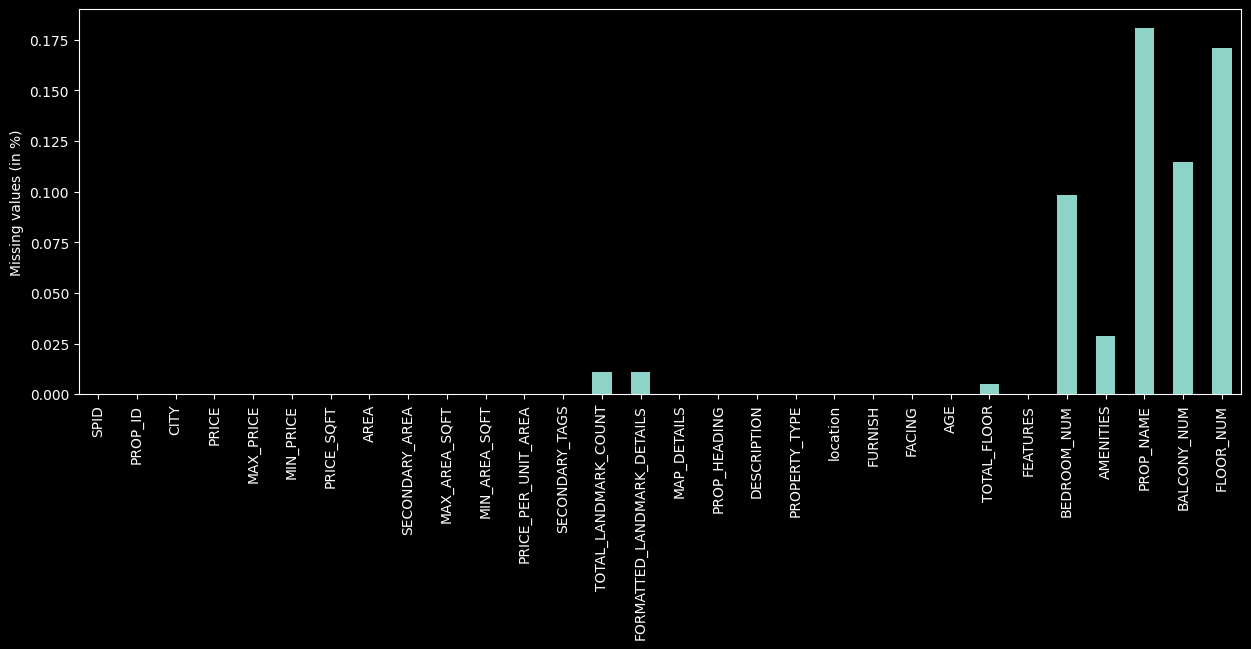

In [8]:
(
    df.isnull()
    .sum()
    .div(df.shape[0])
    .plot(kind='bar', figsize=(15, 5), ylabel='Missing values (in %)')
)

## Price and Area

In [9]:
price_cols = ['PRICE', 'MAX_PRICE', 'MIN_PRICE', 'PRICE_SQFT']
area_cols = ['AREA', 'SECONDARY_AREA', 'MAX_AREA_SQFT', 'MIN_AREA_SQFT', 'PRICE_PER_UNIT_AREA']

price_cols, area_cols

(['PRICE', 'MAX_PRICE', 'MIN_PRICE', 'PRICE_SQFT'],
 ['AREA',
  'SECONDARY_AREA',
  'MAX_AREA_SQFT',
  'MIN_AREA_SQFT',
  'PRICE_PER_UNIT_AREA'])

In [10]:
df[(df['MIN_PRICE'].sub(df['MAX_PRICE']) > 0) | (df['MIN_AREA_SQFT'].sub(df['MAX_AREA_SQFT']) > 0)]

,SPID,PROP_ID,CITY,PRICE,MAX_PRICE,MIN_PRICE,PRICE_SQFT,AREA,SECONDARY_AREA,MAX_AREA_SQFT,MIN_AREA_SQFT,PRICE_PER_UNIT_AREA,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,MAP_DETAILS,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,location,FURNISH,FACING,AGE,TOTAL_FLOOR,FEATURES,BEDROOM_NUM,AMENITIES,PROP_NAME,BALCONY_NUM,FLOOR_NUM


If `('MAX_*' - 'MIN_*' == 0)` this means both features contains same values. You can use anyone of them.

In [11]:
df[(df['PRICE_PER_UNIT_AREA'].sub(df['PRICE_SQFT']) > 0)]

,SPID,PROP_ID,CITY,PRICE,MAX_PRICE,MIN_PRICE,PRICE_SQFT,AREA,SECONDARY_AREA,MAX_AREA_SQFT,MIN_AREA_SQFT,PRICE_PER_UNIT_AREA,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,MAP_DETAILS,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,location,FURNISH,FACING,AGE,TOTAL_FLOOR,FEATURES,BEDROOM_NUM,AMENITIES,PROP_NAME,BALCONY_NUM,FLOOR_NUM


In [12]:
df[['AREA', 'SECONDARY_AREA']].sample(7)

,AREA,SECONDARY_AREA
8740,2290 sq.ft.,212.75 sq.m.
421,2625 sq.ft.,243.87 sq.m.
3436,2606 sq.ft.,242.11 sq.m.
9970,1100 sq.ft.,102.19 sq.m.
7528,2410 sq.ft.,223.9 sq.m.
657,1935 sq.ft.,179.77 sq.m.
3555,2791 sq.ft.,259.29 sq.m.


In [13]:
df[~df['AREA'].str.contains('sq.ft.')]

,SPID,PROP_ID,CITY,PRICE,MAX_PRICE,MIN_PRICE,PRICE_SQFT,AREA,SECONDARY_AREA,MAX_AREA_SQFT,MIN_AREA_SQFT,PRICE_PER_UNIT_AREA,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,MAP_DETAILS,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,location,FURNISH,FACING,AGE,TOTAL_FLOOR,FEATURES,BEDROOM_NUM,AMENITIES,PROP_NAME,BALCONY_NUM,FLOOR_NUM


In [14]:
df[~df['SECONDARY_AREA'].str.contains('sq.m.')]

,SPID,PROP_ID,CITY,PRICE,MAX_PRICE,MIN_PRICE,PRICE_SQFT,AREA,SECONDARY_AREA,MAX_AREA_SQFT,MIN_AREA_SQFT,PRICE_PER_UNIT_AREA,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,MAP_DETAILS,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,location,FURNISH,FACING,AGE,TOTAL_FLOOR,FEATURES,BEDROOM_NUM,AMENITIES,PROP_NAME,BALCONY_NUM,FLOOR_NUM


In [15]:
df[['PRICE', 'MIN_PRICE']].sample(7)

,PRICE,MIN_PRICE
7234,1.53 Cr,15300000
3989,"36,800",36800
3212,58 L,5800000
7523,"83,000",83000
8811,1.39 Cr,13900003
5640,2 Cr,20000000
3301,"65,000",65000


Here, `MIN_PRICE` is integer value of `PRICE` column which is in string value.

In [16]:
df['PRICE'].nunique()

1313

In [17]:
df['PRICE'].str.split().str.get(-1).unique()[:80]

array(['Cr', 'Request', 'L', 'Onwards', '35,000', '65,000', '25,000',
       '27,000', '70,000', '60,000', '15,000', '20,000', '52,000',
       '45,000', '56,000', '85,000', '38,000', '40,000', '26,000',
       '38,201', '50,000', '43,500', '43,000', '95,000', '63,500',
       '80,000', '82,000', '32,000', '31,000', '60,500', '45,500',
       '75,000', '62,000', '90,000', '42,000', '33,000', '12,100',
       '40,500', '46,000', '40,100', '29,000', '30,000', '21,000',
       '58,000', '59,500', '24,000', '48,000', '72,000', '34,000',
       '54,500', '36,000', '53,000', '61,000', '77,000', '29,500',
       '64,000', '55,000', '22,000', '97,000', '93,000', '44,000',
       '59,000', '76,300', '78,000', '77,500', '75,500', '61,500',
       '69,000', '51,000', '54,900', '74,500', '67,000', '41,000',
       '52,500', '28,000', '12,800', '8,000', '84,000', '73,000', '9,000'],
      dtype=object)

In [18]:
# These properties PRICE is not available
df[df['PRICE'].str.contains(r'\d') == False].head(5)

,SPID,PROP_ID,CITY,PRICE,MAX_PRICE,MIN_PRICE,PRICE_SQFT,AREA,SECONDARY_AREA,MAX_AREA_SQFT,MIN_AREA_SQFT,PRICE_PER_UNIT_AREA,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,MAP_DETAILS,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,location,FURNISH,FACING,AGE,TOTAL_FLOOR,FEATURES,BEDROOM_NUM,AMENITIES,PROP_NAME,BALCONY_NUM,FLOOR_NUM
21,70964926,I70964926,Gurgaon,Price on Request,0,0,0.0,2160-90000 sq.ft.,200.67-8361.27 sq.m.,8361.270000,200.670480,0.0,"['READY TO MOVE', 'NEW BOOKING']",8.0,"[{'text': '1 Metro Station'}, {'text': '1 Shop...","{'LATITUDE': '28.397809', 'LONGITUDE': '77.087...",Residential land / Plot in Sector 63 Gurgaon,"Anant raj estate plots in sector-63, gurgaon b...",Residential Land,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN...",0,0,0,0.0,N,NaN,NaN,Anant Raj Estate Plots,NaN,NaN
205,70681942,L70681942,Gurgaon,Price on Request,0,0,0.0,2050 sq.ft.,190.45 sq.m.,190.451150,190.451150,0.0,"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",15.0,"[{'text': '1 Metro Station'}, {'text': '1 Shop...","{'LATITUDE': '28.409433', 'LONGITUDE': '77.105...",4 BHK Flat in Sector 59 Gurgaon,Book your 4 BHK apartment in Conscient Elevate...,Residential Apartment,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN...",0,0,5,33.0,N,4.0,NaN,Conscient Elevate,NaN,1
206,70681940,S70681940,Gurgaon,Price on Request,0,0,0.0,1562 sq.ft.,145.11 sq.m.,145.114486,145.114486,0.0,"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",15.0,"[{'text': '1 Metro Station'}, {'text': '1 Shop...","{'LATITUDE': '28.409433', 'LONGITUDE': '77.105...",3 BHK Flat in Sector 59 Gurgaon,"Book your 3 BHK flat in Sector 59, Gurgaon wit...",Residential Apartment,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN...",0,0,5,33.0,N,3.0,NaN,Conscient Elevate,NaN,1
269,70831824,J70831824,Gurgaon,Price on Request,0,0,0.0,2160-90000 sq.ft.,200.67-8361.27 sq.m.,8361.270000,200.670480,0.0,"['READY TO MOVE', 'NEW BOOKING']",8.0,"[{'text': '1 Metro Station'}, {'text': '1 Shop...","{'LATITUDE': '28.397809', 'LONGITUDE': '77.087...",Residential land / Plot in Sector 63 Gurgaon,"Anant raj estate plots in sector-63, gurgaon b...",Residential Land,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN...",0,0,0,0.0,N,NaN,NaN,Anant Raj Estate Plots,NaN,NaN
270,70830250,Z70830250,Gurgaon,Price on Request,0,0,0.0,2160-9000 sq.ft.,200.67-836.13 sq.m.,836.127000,200.670480,0.0,"['READY TO MOVE', 'NEW BOOKING']",15.0,"[{'text': '3 Educations'}, {'text': '3 Hospita...","{'LATITUDE': '28.410512', 'LONGITUDE': '77.111...",Residential land / Plot in Sector 60 Gurgaon,"Ireo city plots in sector-60 gurgaon, gurgaon ...",Residential Land,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN...",0,0,0,0.0,N,NaN,NaN,Ireo City Plots,NaN,NaN


In [19]:
df[['AREA', 'SECONDARY_AREA', 'MIN_AREA_SQFT']].sample(7)

,AREA,SECONDARY_AREA,MIN_AREA_SQFT
8526,1508 sq.ft.,140.1 sq.m.,140.097724
5415,4548 sq.ft.,422.52 sq.m.,422.522844
3160,1125 sq.ft.,104.52 sq.m.,104.515875
2608,43560 sq.ft.,4046.85 sq.m.,4046.854680
4383,3150 sq.ft.,292.64 sq.m.,292.644450
7636,3150 sq.ft.,292.64 sq.m.,292.644450
6124,4500 sq.ft.,418.06 sq.m.,418.063500


In [20]:
df[
    ['PRICE', 'PRICE_SQFT', 'PRICE_PER_UNIT_AREA', 'AREA', 'MAX_AREA_SQFT', 'SECONDARY_AREA']
].sample(7)

,PRICE,PRICE_SQFT,PRICE_PER_UNIT_AREA,AREA,MAX_AREA_SQFT,SECONDARY_AREA
8131,3.24 Cr,180000.0,180000.0,1620 sq.ft.,150.502860,150.5 sq.m.
3785,1.5 L,373.0,373.0,3618 sq.ft.,336.123054,336.12 sq.m.
3896,4.05 Cr,15644.0,15644.0,2588 sq.ft.,240.432964,240.43 sq.m.
8529,2 Cr,9876.0,9876.0,2025 sq.ft.,188.128575,188.13 sq.m.
7690,5.5 Cr,19203.0,19203.0,2864 sq.ft.,266.074192,266.07 sq.m.
9592,10 Cr,31746.0,31746.0,3150 sq.ft.,292.644450,292.64 sq.m.
9260,"40,000",23.0,23.0,1727 sq.ft.,160.443481,160.44 sq.m.


## Extra

In [21]:
df[['TOTAL_LANDMARK_COUNT', 'FORMATTED_LANDMARK_DETAILS']].sample(7)

,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS
6750,13.0,"[{'text': '1 Metro Station'}, {'text': '1 Shop..."
6076,15.0,"[{'text': '1 Metro Station'}, {'text': '3 Shop..."
6633,48.0,"[{'text': '2 Metro Stations'}, {'text': '2 Rel..."
1867,10.0,"[{'text': '1 Shopping'}, {'text': '1 Connectiv..."
4065,7.0,"[{'text': '1 Metro Station'}, {'text': '1 Conn..."
1839,8.0,"[{'text': '1 Metro Station'}, {'text': '1 Shop..."
2418,50.0,"[{'text': '48 Hospitals'}, {'text': '1 Miscell..."


In [22]:
df['SECONDARY_TAGS'].apply(literal_eval).explode().unique()

array(['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA', 'READY TO MOVE',
       'RESALE', 'NEW LAUNCH', 'NORTH FACING', 'IN GATED COMMUNITY',
       'HUDA APPROVED', 'HSIIDC APPROVED', 'HHB APPROVED',
       'CORNER PROPERTY', 'FOR SINGLE MEN', 'FOR SINGLE WOMEN', nan,
       'FURNISHED', 'EAST FACING', 'NORTH-EAST FACING',
       'AUTHORITY APPROVED', 'SHARED BY 2', 'PRIVATE ROOM', 'SHARED BY 4',
       'SHARED BY 5'], dtype=object)

In [23]:
df['MAP_DETAILS'].sample(7).apply(literal_eval).tolist()

[{'LATITUDE': '28.4234414', 'LONGITUDE': '77.0765927'},
 {'LATITUDE': '28.392382', 'LONGITUDE': '77.089173'},
 {'LATITUDE': '28.401311', 'LONGITUDE': '76.9513432'},
 {'LATITUDE': '28.422235', 'LONGITUDE': '77.033496'},
 {'LATITUDE': '28.51417', 'LONGITUDE': '76.983935'},
 {'LATITUDE': '28.4595', 'LONGITUDE': '77.02664'},
 {'LATITUDE': '28.486212', 'LONGITUDE': '77.09372'}]

In [24]:
df['AMENITIES'].sample(7)

4317     17,5,20,21,44,23,45,24,46,47,19,1,6,30,12,25,2...
1619     10,32,17,2,5,8,20,21,44,23,45,24,46,47,28,29,3...
9657                                           20,21,6,103
10230    17,2,5,20,21,23,24,46,47,28,29,19,1,6,9,30,43,...
8759     5,32,10,44,23,45,24,46,47,28,29,19,1,6,9,30,43...
5054     5,8,20,21,44,23,45,24,47,19,1,6,9,40,30,41,42,...
7409          5,21,23,45,24,46,47,19,9,40,41,42,12,25,26,3
Name: AMENITIES, dtype: object

In [25]:
df['AMENITIES'].sample(7).str.split(',').str.len()

7441     4
4669    34
4071    19
2897    15
5466    31
5606    23
3760    34
Name: AMENITIES, dtype: int64

In [26]:
df['AGE'].value_counts()

AGE
1    3801
6    2274
2    1566
5    1030
0    1000
3     614
Name: count, dtype: int64

### FACING

| id  | label      |
| --- | ---------- |
| 1   | North      |
| 2   | South      |
| 3   | East       |
| 4   | West       |
| 5   | North-East |
| 6   | North-West |
| 7   | South-East |
| 8   | South-West |

**Maybe `0` means `NaN | Undefined`**

In [27]:
df['FACING'].value_counts()

FACING
5    3591
3    2335
1    1379
0    1076
4     579
7     429
6     339
2     318
8     239
Name: count, dtype: int64

In [28]:
df['location'].sample(3).apply(literal_eval).tolist()

[{'CITY': '8',
  'CITY_NAME': 'Gurgaon',
  'BUILDING_ID': '33516',
  'BUILDING_NAME': 'Vatika The Seven Lamps',
  'SOCIETY_NAME': 'Vatika The Seven Lamps',
  'LOCALITY_ID': '7490',
  'LOCALITY_NAME': 'Sector 82 Gurgaon',
  'ADDRESS': None},
 {'CITY': '8',
  'CITY_NAME': 'Gurgaon',
  'BUILDING_ID': '0',
  'BUILDING_NAME': '',
  'SOCIETY_NAME': '',
  'LOCALITY_ID': '2473',
  'LOCALITY_NAME': 'Sector 40 Gurgaon',
  'ADDRESS': '001'},
 {'CITY': '8',
  'CITY_NAME': 'Gurgaon',
  'BUILDING_ID': '0',
  'BUILDING_NAME': '',
  'SOCIETY_NAME': '',
  'LOCALITY_ID': '10452',
  'LOCALITY_NAME': 'C Block Sushant Lok Phase 1',
  'ADDRESS': None}]

In [29]:
# df['SOCIETY_NAME'] = df['location'].apply(literal_eval).str.get('SOCIETY_NAME')
# df['LOCALITY_NAME'] = df['location'].apply(literal_eval).str.get('LOCALITY_NAME')
# df['CITY_NAME'] = df['location'].apply(literal_eval).str.get('CITY_NAME')

In [30]:
df['PROP_HEADING'].sample(7)

8338     3 BHK Independent Builder Floor in South City 1
465       4 BHK Independent Builder Floor in Palam Vihar
9702                    4 BHK Flat in Sector 37D Gurgaon
6370                    4 BHK Flat in Sector 82A Gurgaon
10125                     3 BHK Flat in Sector 2 Gurgaon
867                            4 BHK Flat in DLF Phase 5
115       3 BHK Independent Builder Floor in DLF Phase 1
Name: PROP_HEADING, dtype: object

In [31]:
df['DESCRIPTION'].sample(7)

8932    Find this 3 bhk apartment for rent in sector 6...
8360    Brand new builder floor apartment is available...
4458    4 bhk newly built floor available for sale in ...
3487    Located in the popular residential address of ...
9588    This lovely 3 bhk apartment for rent in sector...
2408    This beautiful 2 bhk flat in sector 108 gurgao...
3140    Best project of gurgoan with alll modern ameni...
Name: DESCRIPTION, dtype: object

In [32]:
df['PROPERTY_TYPE'].value_counts()

PROPERTY_TYPE
Residential Apartment        5982
Independent/Builder Floor    2488
Residential Land              999
Independent House/Villa       638
Farm House                    120
Studio Apartment               43
Serviced Apartments            11
Other                           4
Name: count, dtype: int64

In [33]:
df['PROP_NAME'].sample(7)

9508                          NaN
7744    Signature Global City 63A
4526                          NaN
7394        private builder floor
7364                          NaN
387          Unitech South City 2
4560                 Vipul Greens
Name: PROP_NAME, dtype: object

In [34]:
df['BALCONY_NUM'].value_counts()

BALCONY_NUM
4.0    2937
3.0    2814
2.0    2753
1.0     535
0.0      64
Name: count, dtype: int64

In [35]:
df['FLOOR_NUM'].value_counts()[:10]

FLOOR_NUM
2     1072
1     1060
3      677
4      646
7      490
10     472
6      468
8      463
5      456
9      388
Name: count, dtype: int64

In [36]:
df['BEDROOM_NUM'].value_counts()

BEDROOM_NUM
3.0     4580
4.0     2634
2.0     1402
5.0      267
1.0      214
6.0       59
9.0       27
10.0      18
8.0       16
12.0      15
7.0       14
13.0       4
16.0       4
20.0       3
18.0       3
11.0       3
35.0       3
36.0       2
15.0       1
24.0       1
55.0       1
34.0       1
14.0       1
Name: count, dtype: int64

In [37]:
df['TOTAL_FLOOR'].value_counts().iloc[:10]

TOTAL_FLOOR
4.0     2870
3.0      757
14.0     734
2.0      586
18.0     427
19.0     414
24.0     295
20.0     259
32.0     250
26.0     247
Name: count, dtype: int64